<a href="https://colab.research.google.com/github/IamMarcIvanov/DroughtStudiesProject/blob/master/neuralprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from neuralprophet import NeuralProphet

In [8]:
dataset = pd.read_csv('rain_Point_1.csv')

In [9]:
dataset.head()

,TIME,LONGITUDE,LATITUDE,RAINFALL
0,1951-01-01 00:00:00,81.75,16.5,0.0
1,1951-01-02 00:00:00,81.75,16.5,0.0
2,1951-01-03 00:00:00,81.75,16.5,0.0
3,1951-01-04 00:00:00,81.75,16.5,0.0
4,1951-01-05 00:00:00,81.75,16.5,0.0


In [10]:
dataset.fillna(method= 'ffill')

,TIME,LONGITUDE,LATITUDE,RAINFALL
0,1951-01-01 00:00:00,81.75,16.5,0.0
1,1951-01-02 00:00:00,81.75,16.5,0.0
2,1951-01-03 00:00:00,81.75,16.5,0.0
3,1951-01-04 00:00:00,81.75,16.5,0.0
4,1951-01-05 00:00:00,81.75,16.5,0.0
...,...,...,...,...
25563,2020-12-27 00:00:00,81.75,16.5,0.0
25564,2020-12-28 00:00:00,81.75,16.5,0.0
25565,2020-12-29 00:00:00,81.75,16.5,0.0
25566,2020-12-30 00:00:00,81.75,16.5,0.0


In [17]:
dataset['TIME'] = pd.to_datetime(dataset['TIME'])

In [23]:
dataset.head()

,TIME,LONGITUDE,LATITUDE,RAINFALL
0,1951-01-01,81.75,16.5,0.0
1,1951-01-02,81.75,16.5,0.0
2,1951-01-03,81.75,16.5,0.0
3,1951-01-04,81.75,16.5,0.0
4,1951-01-05,81.75,16.5,0.0


In [24]:
dataset.drop(columns= ['LONGITUDE', 'LATITUDE'], inplace= True)

In [25]:
dataset.head()

,TIME,RAINFALL
0,1951-01-01,0.0
1,1951-01-02,0.0
2,1951-01-03,0.0
3,1951-01-04,0.0
4,1951-01-05,0.0


In [36]:
y_train = dataset[dataset['TIME'] < '2015-01-01']
y_test = dataset[dataset['TIME'] > '2015-01-01']
y_train.rename(columns= {'TIME':'ds', 'RAINFALL':'y'}, inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [95]:
model = NeuralProphet()

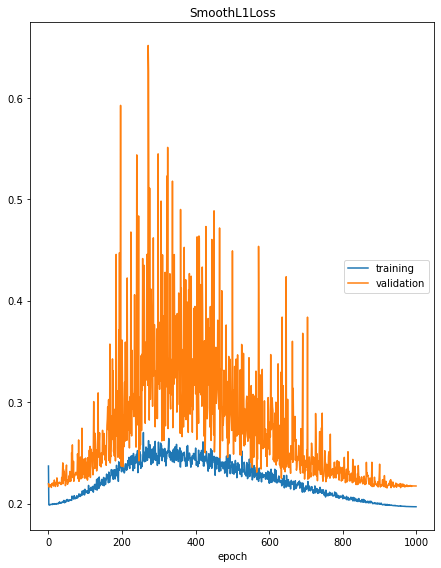

Epoch[1000/1000]: 100%|██████████| 1000/1000 [10:12<00:00,  1.63it/s, SmoothL1Loss=0.197, MAE=3.86, RegLoss=0, MAE_val=4.5, SmoothL1Loss_val=0.217]


,SmoothL1Loss,MAE,RegLoss,SmoothL1Loss_val,MAE_val
0,0.237026,4.895437,0.0,0.219487,4.561127
1,0.198816,4.000590,0.0,0.216775,4.329025
2,0.198798,3.985149,0.0,0.216297,4.328121
3,0.198473,3.974977,0.0,0.218724,4.504980
4,0.199172,3.993671,0.0,0.217966,4.294569
...,...,...,...,...,...
995,0.196891,3.865356,0.0,0.217355,4.499270
996,0.196887,3.863732,0.0,0.217349,4.498600
997,0.196884,3.863921,0.0,0.217357,4.500092
998,0.196884,3.863238,0.0,0.217356,4.500292


In [38]:
model.fit(y_train, freq= 'D', epochs= 1000, validate_each_epoch= True,
          plot_live_loss= True)

In [40]:
periods = y_test.shape[0]
future = model.make_future_dataframe(y_train, periods= periods)
forecast = model.predict(future)

In [42]:
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2015-01-01,None,1.179726,NaN,2.724717,-1.635879,0.090888
1,2015-01-02,None,1.005634,NaN,2.724819,-1.647450,-0.071734
2,2015-01-03,None,0.972407,NaN,2.724920,-1.659545,-0.092968
3,2015-01-04,None,0.942893,NaN,2.725022,-1.672065,-0.110064
4,2015-01-05,None,1.157151,NaN,2.725123,-1.684902,0.116930


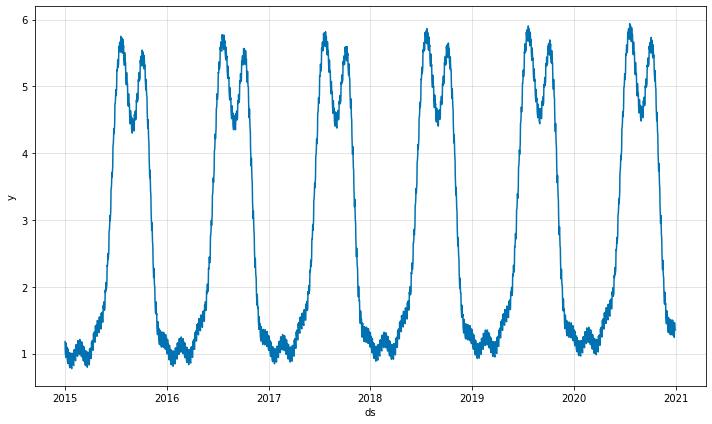

In [43]:
plot1 = model.plot(forecast)

In [ ]:
forecast = forecast.drop(columns = ['y', 'residual1', 'trend',
                                     'season_yearly', 'season_weekly',]).set_index(y_test['TIME'])

In [83]:
forecast = forecast.drop(columns='ds')

In [64]:
y_test.keys()

Index(['TIME', 'RAINFALL'], dtype='object')

In [74]:
y_test = y_test.set_index(y_test['TIME'])
y_test.drop(columns= 'TIME')

,RAINFALL
TIME,
2015-01-02,0.0
2015-01-03,0.0
2015-01-04,0.0
2015-01-05,0.0
2015-01-06,0.0
...,...
2020-12-27,0.0
2020-12-28,0.0
2020-12-29,0.0


In [91]:
forecast.rename(columns= {'yhat1':'Predicted'}, inplace= True)

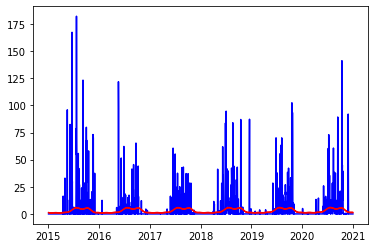

In [92]:
plt.plot(y_test['RAINFALL'], c= 'blue')
plt.plot(forecast['Predicted'], c='red')

In [93]:
from sklearn.metrics import r2_score

In [94]:
r2_score(y_test['RAINFALL'], forecast['Predicted'])

0.045225545121263755